In [1]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Let's check the features present in our data and then we will look at their data types.

In [3]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [5]:
train.shape, test.shape

((31647, 18), (13564, 17))

In [6]:
# Print data types for each variable
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [7]:
#printing first five rows of the dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


## Univariate Analysis

In [8]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [9]:
# Normalize can be set to True to print proportions instead of number 
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

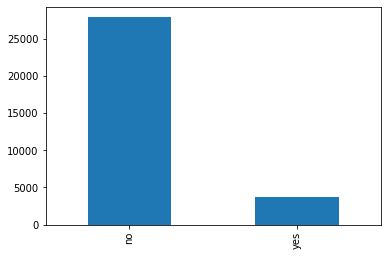

In [10]:
# plotting the bar plot of frequencies
train['subscribed'].value_counts().plot.bar()

<AxesSubplot:xlabel='age', ylabel='Density'>

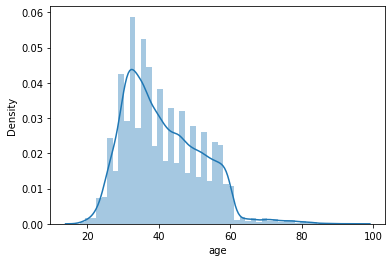

In [11]:
sn.distplot(train["age"])

<AxesSubplot:>

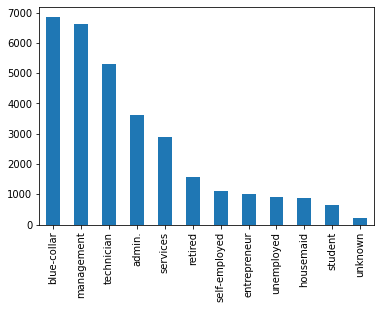

In [12]:
train['job'].value_counts().plot.bar()

<AxesSubplot:>

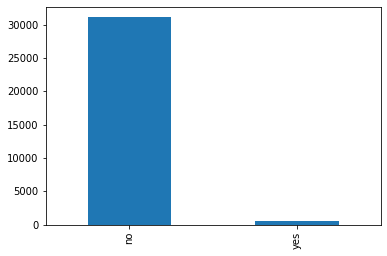

In [13]:
train['default'].value_counts().plot.bar()

More than 90% of the clients have no default history. Now we will explore these variables against the target variable using bivariate analysis. We will make use of scatter plots for continuous or numeric variables and crosstabs for the categorical variables. Let's start with job and subscribed variable.

## Bivariate Analysis

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

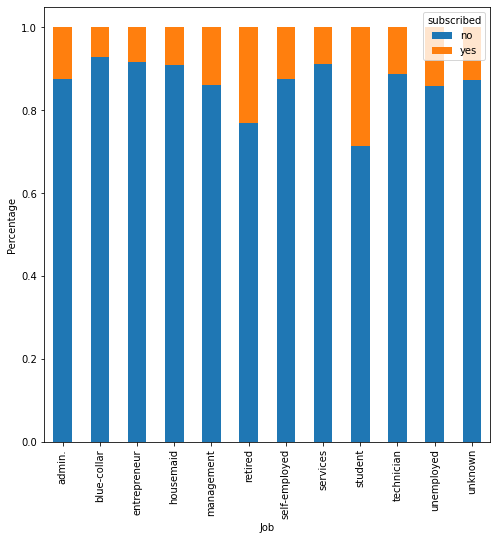

In [14]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

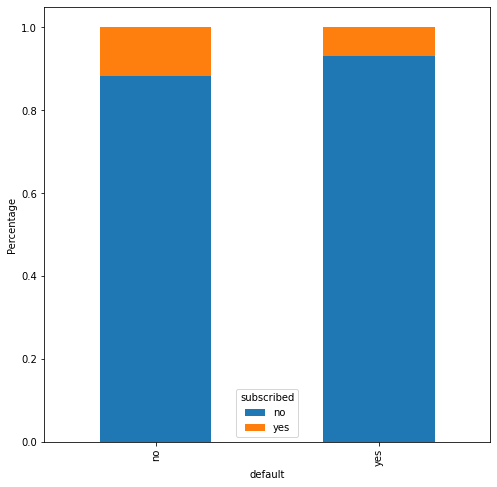

In [15]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [16]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

## Model Building

In [17]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [18]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state=12)

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# defining the logistic regression model
lreg = LogisticRegression()

In [23]:
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)

LogisticRegression()

In [24]:
# making prediction on the validation set
prediction = lreg.predict(X_test)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
# calculating the accuracy score
accuracy_score(y_test, prediction)

0.8870458135860979

We got an accuracy score of around 90% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity. 

Let's try decision tree algorithm now to check if we get better accuracy with that. 

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
count=[]
for depth in range(1,11):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train,y_train)
    count.append(accuracy_score(y_test,clf.predict(X_test)))
count

[0.8859399684044234,
 0.8985781990521327,
 0.9018957345971564,
 0.9042654028436019,
 0.9063191153238547,
 0.9037914691943127,
 0.9037914691943127,
 0.9048973143759874,
 0.90173775671406,
 0.8993680884676145]

we get more then 905 accuracy 

In [42]:
clf = DecisionTreeClassifier(max_depth=8, random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [43]:

predict = clf.predict(X_test)

In [44]:

accuracy_score(y_test, predict)

0.9048973143759874

In [32]:
test = pd.get_dummies(test)

In [33]:
test_prediction = clf.predict(test)

In [34]:
submission = pd.DataFrame()

In [35]:
# creating a Business_Sourced column and saving the predictions in it
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [36]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [37]:
submission.to_csv('submission.csv', header=True, index=False)